# Credit Card Fraud Detection with AutoXGB

## Part 2 - Baseline Model: XGBoost with RandomizedSearchCV
___

### Import dependencies and data

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import xgboost as xgb
from xgboost import XGBClassifier, plot_importance

import sklearn.metrics as metrics
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

In [53]:
print(xgb.__version__)

1.2.1


If you are running this notebook on Colab, make sure to upgrade the XGBoost version (default version on Colab is 0.90) using `!pip install xgboost --upgrade`

In [54]:
# !pip install xgboost --upgrade

In [55]:
# Import processed datasets
main_df = pd.read_csv('data/processed/train.csv')
test_df = pd.read_csv('data/processed/test.csv')

In [56]:
main_df.head()

,TX_AMOUNT,TX_DURING_WEEKEND,TX_DURING_NIGHT,CUSTOMER_ID_NB_TX_1DAY_WINDOW,CUSTOMER_ID_NB_TX_7DAY_WINDOW,CUSTOMER_ID_NB_TX_30DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_1DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW,TERMINAL_ID_NB_TX_1DAY_WINDOW,TERMINAL_ID_NB_TX_7DAY_WINDOW,TERMINAL_ID_NB_TX_30DAY_WINDOW,TERMINAL_ID_RISK_1DAY_WINDOW,TERMINAL_ID_RISK_7DAY_WINDOW,TERMINAL_ID_RISK_30DAY_WINDOW,TX_FRAUD
0,21.47,0,0,2.0,25.0,109.0,22.250,36.411200,36.684587,3.0,8.0,40.0,0.0,0.0,0.0000,0
1,47.09,0,0,2.0,11.0,37.0,52.015,50.244545,42.980811,0.0,3.0,16.0,0.0,0.0,0.0625,0
2,71.58,1,0,5.0,16.0,78.0,76.220,63.748750,61.781026,0.0,4.0,21.0,0.0,0.0,0.0000,0
3,111.57,0,0,4.0,28.0,102.0,114.730,114.735000,95.709412,0.0,6.0,37.0,0.0,0.0,0.0000,0
4,84.45,0,0,1.0,24.0,116.0,84.450,53.076667,56.270517,1.0,8.0,42.0,0.0,0.0,0.0000,0


### Data Preparation

In [57]:
# Define target variable
target = 'TX_FRAUD'

In [58]:
# View labels
main_df[target].value_counts(dropna=False)

0    55060
1    27530
Name: TX_FRAUD, dtype: int64

In [59]:
# Set X and y datasets
X = main_df.drop(columns=target)
y = main_df[target]

### Run XGBoost Classification

In [60]:
# Set parameter grid
xgb_params = {'max_depth': [3, 5, 6, 8, 9, 10, 11], # Maximum depth of a tree
              'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.5], # Step size shrinkage used in update to prevents overfitting
              'subsample': np.arange(0.4, 1.0, 0.1),
              'colsample_bytree': np.arange(0.3, 1.0, 0.1), # Number of features supplied to a tree
              'colsample_bylevel': np.arange(0.3, 1.0, 0.1),
              'n_estimators': np.arange(100, 600, 100),
              'gamma': np.arange(0, 0.7, 0.1)}

In [61]:
# Create RandomizedSearchCV instance
xgb_grid = RandomizedSearchCV(estimator=XGBClassifier(objective='binary:logistic', 
                                                      tree_method="hist", # Use GPU
                                                      random_state=42,
                                                      eval_metric='aucpr'), # AUC under PR curve
                              param_distributions=xgb_params, 
                              cv=5, 
                              verbose=2,
                              n_iter=50,
                              scoring='average_precision') 

In [62]:
%%time

# Run XGBoost grid search
xgb_grid.fit(X, y)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END colsample_bylevel=0.8000000000000003, colsample_bytree=0.7000000000000002, gamma=0.6000000000000001, learning_rate=0.5, max_depth=5, n_estimators=300, subsample=0.4; total time=   3.1s
[CV] END colsample_bylevel=0.8000000000000003, colsample_bytree=0.7000000000000002, gamma=0.6000000000000001, learning_rate=0.5, max_depth=5, n_estimators=300, subsample=0.4; total time=   4.4s
[CV] END colsample_bylevel=0.8000000000000003, colsample_bytree=0.7000000000000002, gamma=0.6000000000000001, learning_rate=0.5, max_depth=5, n_estimators=300, subsample=0.4; total time=   4.5s
[CV] END colsample_bylevel=0.8000000000000003, colsample_bytree=0.7000000000000002, gamma=0.6000000000000001, learning_rate=0.5, max_depth=5, n_estimators=300, subsample=0.4; total time=   4.5s
[CV] END colsample_bylevel=0.8000000000000003, colsample_bytree=0.7000000000000002, gamma=0.6000000000000001, learning_rate=0.5, max_depth=5, n_estimators=300, su

[CV] END colsample_bylevel=0.9000000000000001, colsample_bytree=0.9000000000000001, gamma=0.2, learning_rate=0.01, max_depth=11, n_estimators=200, subsample=0.7999999999999999; total time=   6.5s
[CV] END colsample_bylevel=0.9000000000000001, colsample_bytree=0.9000000000000001, gamma=0.2, learning_rate=0.01, max_depth=11, n_estimators=200, subsample=0.7999999999999999; total time=   6.2s
[CV] END colsample_bylevel=0.9000000000000001, colsample_bytree=0.9000000000000001, gamma=0.2, learning_rate=0.01, max_depth=11, n_estimators=200, subsample=0.7999999999999999; total time=   6.1s
[CV] END colsample_bylevel=0.9000000000000001, colsample_bytree=0.9000000000000001, gamma=0.2, learning_rate=0.01, max_depth=11, n_estimators=200, subsample=0.7999999999999999; total time=   6.3s
[CV] END colsample_bylevel=0.3, colsample_bytree=0.8000000000000003, gamma=0.0, learning_rate=0.5, max_depth=11, n_estimators=300, subsample=0.8999999999999999; total time=   6.4s
[CV] END colsample_bylevel=0.3, cols

[CV] END colsample_bylevel=0.3, colsample_bytree=0.6000000000000001, gamma=0.30000000000000004, learning_rate=0.3, max_depth=5, n_estimators=500, subsample=0.4; total time=   7.3s
[CV] END colsample_bylevel=0.3, colsample_bytree=0.6000000000000001, gamma=0.30000000000000004, learning_rate=0.3, max_depth=5, n_estimators=500, subsample=0.4; total time=   7.3s
[CV] END colsample_bylevel=0.5, colsample_bytree=0.6000000000000001, gamma=0.30000000000000004, learning_rate=0.3, max_depth=5, n_estimators=500, subsample=0.4; total time=   7.8s
[CV] END colsample_bylevel=0.5, colsample_bytree=0.6000000000000001, gamma=0.30000000000000004, learning_rate=0.3, max_depth=5, n_estimators=500, subsample=0.4; total time=   7.3s
[CV] END colsample_bylevel=0.5, colsample_bytree=0.6000000000000001, gamma=0.30000000000000004, learning_rate=0.3, max_depth=5, n_estimators=500, subsample=0.4; total time=   9.0s
[CV] END colsample_bylevel=0.5, colsample_bytree=0.6000000000000001, gamma=0.30000000000000004, lear

[CV] END colsample_bylevel=0.3, colsample_bytree=0.9000000000000001, gamma=0.30000000000000004, learning_rate=0.1, max_depth=10, n_estimators=400, subsample=0.5; total time=  10.1s
[CV] END colsample_bylevel=0.3, colsample_bytree=0.9000000000000001, gamma=0.30000000000000004, learning_rate=0.1, max_depth=10, n_estimators=400, subsample=0.5; total time=  10.2s
[CV] END colsample_bylevel=0.3, colsample_bytree=0.9000000000000001, gamma=0.30000000000000004, learning_rate=0.1, max_depth=10, n_estimators=400, subsample=0.5; total time=   9.2s
[CV] END colsample_bylevel=0.3, colsample_bytree=0.9000000000000001, gamma=0.30000000000000004, learning_rate=0.1, max_depth=10, n_estimators=400, subsample=0.5; total time=   9.6s
[CV] END colsample_bylevel=0.6000000000000001, colsample_bytree=0.6000000000000001, gamma=0.0, learning_rate=0.01, max_depth=11, n_estimators=500, subsample=0.7999999999999999; total time=  14.7s
[CV] END colsample_bylevel=0.6000000000000001, colsample_bytree=0.60000000000000

[CV] END colsample_bylevel=0.9000000000000001, colsample_bytree=0.8000000000000003, gamma=0.6000000000000001, learning_rate=0.5, max_depth=5, n_estimators=400, subsample=0.7999999999999999; total time=   6.9s
[CV] END colsample_bylevel=0.9000000000000001, colsample_bytree=0.8000000000000003, gamma=0.6000000000000001, learning_rate=0.5, max_depth=5, n_estimators=400, subsample=0.7999999999999999; total time=   6.7s
[CV] END colsample_bylevel=0.9000000000000001, colsample_bytree=0.8000000000000003, gamma=0.6000000000000001, learning_rate=0.5, max_depth=5, n_estimators=400, subsample=0.7999999999999999; total time=   6.8s
[CV] END colsample_bylevel=0.9000000000000001, colsample_bytree=0.8000000000000003, gamma=0.6000000000000001, learning_rate=0.5, max_depth=5, n_estimators=400, subsample=0.7999999999999999; total time=   7.1s
[CV] END colsample_bylevel=0.9000000000000001, colsample_bytree=0.4, gamma=0.1, learning_rate=0.1, max_depth=8, n_estimators=300, subsample=0.5; total time=   5.3s


[CV] END colsample_bylevel=0.6000000000000001, colsample_bytree=0.5, gamma=0.0, learning_rate=0.3, max_depth=5, n_estimators=200, subsample=0.6; total time=   3.1s
[CV] END colsample_bylevel=0.6000000000000001, colsample_bytree=0.5, gamma=0.0, learning_rate=0.3, max_depth=5, n_estimators=200, subsample=0.6; total time=   3.1s
[CV] END colsample_bylevel=0.7000000000000002, colsample_bytree=0.3, gamma=0.6000000000000001, learning_rate=0.5, max_depth=9, n_estimators=300, subsample=0.6; total time=   5.0s
[CV] END colsample_bylevel=0.7000000000000002, colsample_bytree=0.3, gamma=0.6000000000000001, learning_rate=0.5, max_depth=9, n_estimators=300, subsample=0.6; total time=   5.7s
[CV] END colsample_bylevel=0.7000000000000002, colsample_bytree=0.3, gamma=0.6000000000000001, learning_rate=0.5, max_depth=9, n_estimators=300, subsample=0.6; total time=   5.7s
[CV] END colsample_bylevel=0.7000000000000002, colsample_bytree=0.3, gamma=0.6000000000000001, learning_rate=0.5, max_depth=9, n_estima

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           eval_metric='aucpr', gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=No...
                   param_distributions={'colsample_bylevel': array([0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'colsample_bytree': array([0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'gamma': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]),
                                        'learning_rate': [0.01, 0.1, 0.2, 0.3,
                                                          0.5],
                                        'max_depth': [3, 5, 6, 8, 9, 10, 11],
                                        'n_estimators': array([100, 200, 300, 400, 500]),
                                        'subsample': array([0.4, 0.5, 0.6, 0.7, 0.8, 0.9])},
                   scoring='average_precision', verbose=2)

In [63]:
# Best parameters from RandomizedSearchCV
xgb_grid.best_params_

{'subsample': 0.5,
 'n_estimators': 400,
 'max_depth': 10,
 'learning_rate': 0.1,
 'gamma': 0.30000000000000004,
 'colsample_bytree': 0.9000000000000001,
 'colsample_bylevel': 0.3}

In [64]:
# Get best XGBoost model (based on best parameters) and predict on test set
xgb_best = xgb_grid.best_estimator_

### Predict on Test Set

In [65]:
# Set X and y datasets
X_test = test_df.drop(columns=target)
y_test = test_df[target]

# Get prediction probabilities
preds_proba = xgb_best.predict_proba(X_test)
preds_proba

array([[9.7698033e-01, 2.3019686e-02],
       [9.9238545e-01, 7.6145269e-03],
       [9.9959898e-01, 4.0100960e-04],
       ...,
       [9.9319422e-01, 6.8057971e-03],
       [9.9828261e-01, 1.7174181e-03],
       [9.8612994e-01, 1.3870084e-02]], dtype=float32)

In [66]:
# Get prediction probabilities for label 1
y_preds_proba = preds_proba[:,1]
y_preds_proba

array([0.02301969, 0.00761453, 0.00040101, ..., 0.0068058 , 0.00171742,
       0.01387008], dtype=float32)

In [67]:
# Get predicted labels
preds = xgb_best.predict(X_test)
preds

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### Review performance metrics

In [68]:
# Define function to consolidate and display performance metrics
def gen_performance_metrics(y_true, y_preds, y_preds_proba, model_name, round_to=3):
    accuracy = round(metrics.accuracy_score(y_true, y_preds), round_to)
    f1_score = round(metrics.f1_score(y_true, y_preds), round_to)
    roc_auc = round(metrics.roc_auc_score(y_true, y_preds_proba), round_to)
    avg_precision = round(metrics.average_precision_score(y_true, y_preds_proba), round_to)

    df = pd.DataFrame([[model_name, accuracy, f1_score, roc_auc, avg_precision]], 
                        columns=['Model', 'Accuracy', 'F1 Score', 'ROC AUC Score', 'Average Precision'])
    
    display(df)
    display(metrics.ConfusionMatrixDisplay.from_predictions(y_true, y_preds))

,Model,Accuracy,F1 Score,ROC AUC Score,Average Precision
0,XGBoost + RandomizedSearchCV,0.995,0.724,0.912,0.775


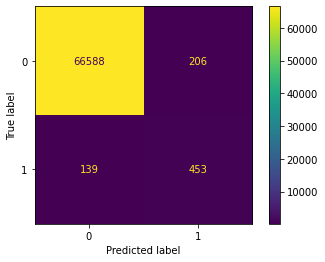

In [70]:
# Show performance assessment
gen_performance_metrics(y_test, preds, y_preds_proba, 'XGBoost + RandomizedSearchCV')

In [75]:
import pickle
artifact_filename = 'model.pkl'

# Save model artifact to local filesystem (doesn't persist)
local_path = artifact_filename
with open(local_path, 'wb') as model_file:
  pickle.dump(xgb_best, model_file)

In [84]:
pickled_model = pickle.load(open('model.pkl', 'rb'))